# 🤖 Clasificador de imágenes con CNN – CIFAR-100

**Notebook 02 – Modelo Base**

En este notebook construiremos un modelo base de red neuronal convolucional (CNN) utilizando Keras para clasificar imágenes del dataset CIFAR-100.

---


## 🧰 1. Importaciones y configuración

Importamos TensorFlow y las librerías necesarias para construir, entrenar y evaluar nuestro modelo.


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## 📦 2. Carga del dataset

Reutilizamos la API de Keras para cargar el conjunto de datos CIFAR-100 con etiquetas detalladas ("fine").


In [5]:
from tensorflow.keras.datasets import cifar100

# Cargar CIFAR-100 (modo 'fine' para las 100 clases)
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


## 🧼 3. Preprocesamiento de datos

- Normalización de imágenes (rescalar píxeles entre 0 y 1).  
- Codificación de etiquetas en formato one-hot para clasificación multiclase.


In [6]:
# Normalizar los valores de píxeles entre 0 y 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, 100)
y_test_cat = to_categorical(y_test, 100)

## 🧠 4. Construcción del modelo CNN

Creamos un modelo base con arquitectura CNN sencilla que servirá como línea base para mejoras futuras.


In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='softmax')
])


## 🧪 5. Compilación y resumen del modelo

Definimos el optimizador, la función de pérdida y las métricas.  
Mostramos la arquitectura del modelo.


In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

## 🚀 6. Entrenamiento del modelo

Entrenamos el modelo en el conjunto de entrenamiento con validación sobre el conjunto de prueba.  
Guardamos el historial para análisis posterior.


In [9]:
# Entrenamiento del modelo
history = model.fit(
    x_train, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

2025-03-31 16:17:34.651153: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/20
625/625 [==============================] - ETA: 0s - loss: 4.0603 - accuracy: 0.0803

2025-03-31 16:17:54.551059: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


625/625 [==============================] - 21s 33ms/step - loss: 4.0603 - accuracy: 0.0803 - val_loss: 3.6504 - val_accuracy: 0.1415
Epoch 2/20
625/625 [==============================] - 18s 28ms/step - loss: 3.4133 - accuracy: 0.1848 - val_loss: 3.2667 - val_accuracy: 0.2131
Epoch 3/20
625/625 [==============================] - 21s 34ms/step - loss: 3.0956 - accuracy: 0.2417 - val_loss: 3.0347 - val_accuracy: 0.2532
Epoch 4/20
625/625 [==============================] - 19s 30ms/step - loss: 2.8826 - accuracy: 0.2824 - val_loss: 2.9820 - val_accuracy: 0.2701
Epoch 5/20
625/625 [==============================] - 17s 27ms/step - loss: 2.7095 - accuracy: 0.3192 - val_loss: 2.8285 - val_accuracy: 0.2988
Epoch 6/20
625/625 [==============================] - 18s 28ms/step - loss: 2.5733 - accuracy: 0.3471 - val_loss: 2.7731 - val_accuracy: 0.3137
Epoch 7/20
625/625 [==============================] - 19s 31ms/step - loss: 2.4600 - accuracy: 0.3694 - val_loss: 2.7210 - val_accuracy: 0.3167
Epo

## 📈 7. Evaluación y visualización de resultados

Graficamos la precisión y pérdida en entrenamiento y validación para detectar underfitting o overfitting.


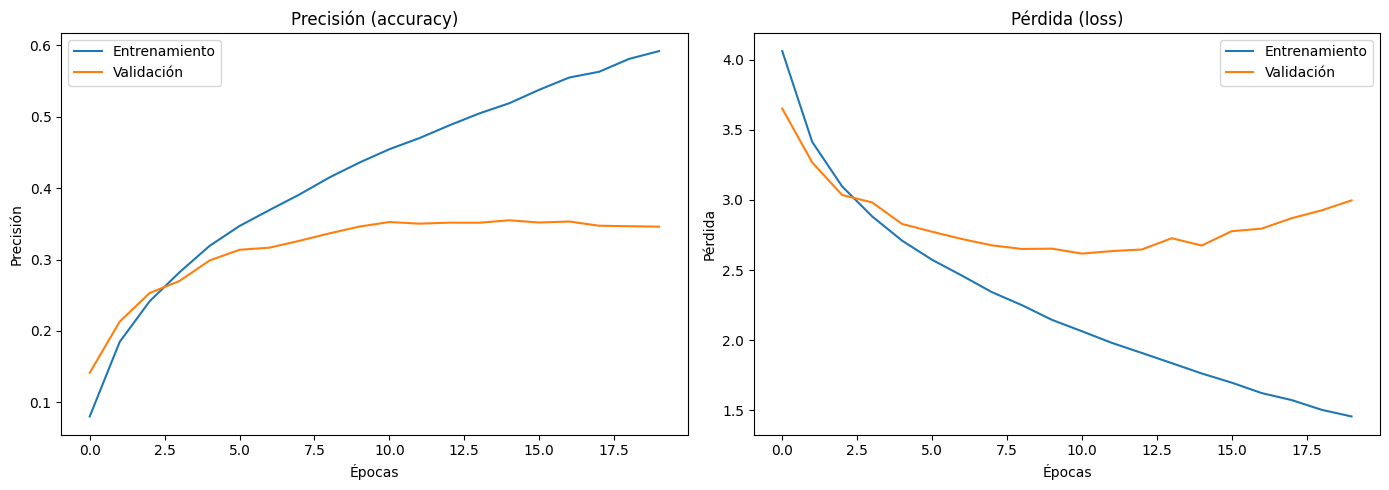

In [10]:
# Función auxiliar para graficar
def plot_history(hist):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Entrenamiento')
    plt.plot(hist.history['val_accuracy'], label='Validación')
    plt.title('Precisión (accuracy)')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Entrenamiento')
    plt.plot(hist.history['val_loss'], label='Validación')
    plt.title('Pérdida (loss)')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Graficar
plot_history(history)


In [11]:
# Evaluar en el set de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"🔍 Test accuracy: {test_accuracy:.4f}")
print(f"📉 Test loss: {test_loss:.4f}")


 19/313 [>.............................] - ETA: 1s - loss: 3.0889 - accuracy: 0.3470

2025-03-31 16:27:24.296507: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 5ms/step - loss: 2.9415 - accuracy: 0.3516
🔍 Test accuracy: 0.3516
📉 Test loss: 2.9415


## 🧠 Conclusiones del modelo base

- El modelo base logró alcanzar un 59% de precisión en entrenamiento y alrededor de 35% en validación.
- Se detectó un inicio de overfitting a partir de la época 10.
- La arquitectura actual es una buena base, pero requiere mejoras para generalizar mejor a nuevas imágenes.

---

## 🧪 Próximo notebook

📁 `03_mejoras_modelo_cnn.ipynb` – Aplicación de técnicas de mejora como data augmentation, regularización y modelos preentrenados (transfer learning).

---
